In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Association Rules

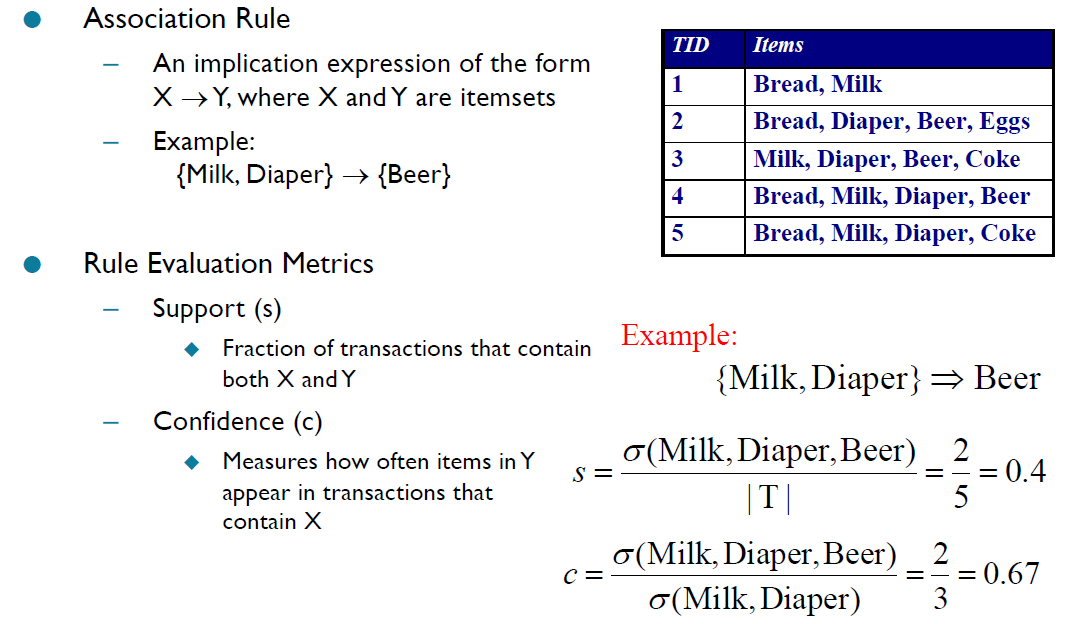

## 연습예제

##### data: Faceplate.csv

그냥 실습용으로 만든 합성데이터, 어떤 색 조합이 연관성이 높을지 살펴보자

In [2]:
fp_df = pd.read_csv('./data/Faceplate.csv')
fp_df.set_index('Transaction', inplace=True)
fp_df

,Red,White,Blue,Orange,Green,Yellow
Transaction,,,,,,
1,1,1,0,0,1,0
2,0,1,0,1,0,0
3,0,1,1,0,0,0
4,1,1,0,1,0,0
5,1,0,1,0,0,0
6,0,1,1,0,0,0
7,1,0,1,0,0,0
8,1,1,1,0,1,0
9,1,1,1,0,0,0


##### import modules

In [4]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpmax
from mlxtend.frequent_patterns import association_rules

##### apriori를 활용하여 itemset과 itemset별 support 값을 출력하시오.
- apriori 함수 활용
- 최소지지도 (min_support) = 0.2

In [7]:
itemsets = apriori(fp_df, min_support=0.2, use_colnames=True)
itemsets.sort_values("support", ascending=False)

,support,itemsets
1,0.7,(White)
0,0.6,(Red)
2,0.6,(Blue)
5,0.4,"(White, Red)"
6,0.4,"(Blue, Red)"
8,0.4,"(Blue, White)"
3,0.2,(Orange)
4,0.2,(Green)
7,0.2,"(Green, Red)"
9,0.2,"(Orange, White)"


##### maximal frequent itemsets

In [8]:
fpmax(fp_df, min_support=0.2, use_colnames=True)

,support,itemsets
0,0.2,"(Orange, White)"
1,0.2,"(White, Green, Red)"
2,0.2,"(White, Blue, Red)"


##### association_rules을 이용하여 지지도 (Support), 신뢰도 (Confidence) 그리고 향상도 (Lift)를 구하시오.
- min_threshold : 0.5

In [13]:
itemsets = apriori(fp_df, min_support=0.2, use_colnames=True)
rules = association_rules(itemsets, min_threshold=0.5)
rules
#rules[rules.lift>1].sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(White),(Red),0.7,0.6,0.4,0.571429,0.952381,-0.02,0.933333
1,(Red),(White),0.6,0.7,0.4,0.666667,0.952381,-0.02,0.900000
2,(Blue),(Red),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200000
3,(Red),(Blue),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200000
4,(Green),(Red),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Blue),(White),0.6,0.7,0.4,0.666667,0.952381,-0.02,0.900000
6,(White),(Blue),0.7,0.6,0.4,0.571429,0.952381,-0.02,0.933333
7,(Orange),(White),0.2,0.7,0.2,1.000000,1.428571,0.06,inf
8,(Green),(White),0.2,0.7,0.2,1.000000,1.428571,0.06,inf
9,"(Blue, White)",(Red),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.800000


##### (참고) leverage & conviction
- leverage(X -> Y) = P(X and Y) - (P(X)P(Y))
- conviction(X -> Y) = P(X)P(not Y)/P(X and not Y)=(1-sup(Y))/(1-conf(X -> Y))

##### single consequents만 출력할 수 있게 filter를 적용하여 결과를 출력하시오.

In [14]:
rules[[len(c)==1 for c in rules.consequents]]\
.sort_values(["consequents", "lift", "confidence"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,"(Red, White)",(Green),0.4,0.2,0.2,0.500000,2.500000,0.12,1.600000
3,(Red),(Blue),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200000
6,(White),(Blue),0.7,0.6,0.4,0.571429,0.952381,-0.02,0.933333
10,"(Red, White)",(Blue),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.800000
7,(Orange),(White),0.2,0.7,0.2,1.000000,1.428571,0.06,inf
8,(Green),(White),0.2,0.7,0.2,1.000000,1.428571,0.06,inf
14,"(Red, Green)",(White),0.2,0.7,0.2,1.000000,1.428571,0.06,inf
1,(Red),(White),0.6,0.7,0.4,0.666667,0.952381,-0.02,0.900000
5,(Blue),(White),0.6,0.7,0.4,0.666667,0.952381,-0.02,0.900000
11,"(Blue, Red)",(White),0.4,0.7,0.2,0.500000,0.714286,-0.08,0.600000


## 실습 data: CharlesBookClub.csv
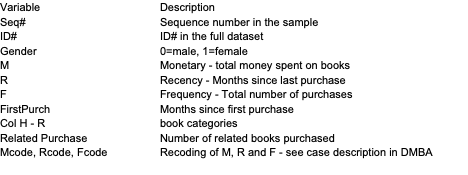

##### data
연습을 위해 original data를 변형하여 transaction_df를 만들었음

In [16]:
all_books_df = pd.read_csv('./data/CharlesBookClub.csv')
df = pd.concat([all_books_df["ID#"], all_books_df.Gender, all_books_df.loc[:, "ChildBks":"Florence"]], axis=1)
tmp_df = pd.melt(df, id_vars=["ID#", "Gender"], value_vars=df.columns[2:], var_name="book")
tmp_df = tmp_df.drop(tmp_df[tmp_df.value==0].index)
for i in sorted(tmp_df["value"].unique()):
    if i==1:
        transaction_df = tmp_df[tmp_df["value"]==i].copy()
    else:
        for _ in range(i):
            transaction_df = pd.concat([transaction_df, tmp_df[tmp_df["value"]==i]])
transaction_df.drop("value", inplace=True, axis=1)
transaction_df.reset_index(drop=True, inplace=True)
transaction_df

,ID#,Gender,book
0,79,1,ChildBks
1,112,0,ChildBks
2,208,1,ChildBks
3,256,1,ChildBks
4,257,1,ChildBks
...,...,...,...
13004,20640,1,ChildBks
13005,22402,0,ChildBks
13006,5610,1,CookBks
13007,15777,1,CookBks


##### transaction_df를 mlxtend 사용을 위해 필요한 형태로 변형하시오.
- 일단 몇 권을 샀는지는 중요하게 보지 말고 구매 여부만으로 association rule 분석을 할 것임

In [18]:
mlx_df = transaction_df.pivot_table(columns="book", index=["ID#", "Gender"], aggfunc=len)

In [21]:
mlx_df.fillna(0, inplace=True)
mlx_df.head()

,book,ArtBks,ChildBks,CookBks,DoItYBks,Florence,GeogBks,ItalArt,ItalAtlas,ItalCook,RefBks,YouthBks
ID#,Gender,,,,,,,,,,,
25,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46,1,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
61,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
79,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
mlx_df = mlx_df.applymap(lambda x: 1 if x>=1 else 0)
mlx_df.head()

,book,ArtBks,ChildBks,CookBks,DoItYBks,Florence,GeogBks,ItalArt,ItalAtlas,ItalCook,RefBks,YouthBks
ID#,Gender,,,,,,,,,,,
25,1,0,0,1,0,0,0,0,0,0,0,1
46,1,0,1,1,0,0,1,0,0,1,1,1
61,1,0,0,0,0,0,1,0,0,0,0,0
79,1,0,1,0,0,0,0,0,0,0,0,0
90,1,0,0,1,0,0,0,0,0,0,0,0


In [9]:
mlx_df = transaction_df.pivot_table(columns="book", index=["ID#", "Gender"], aggfunc=len)
mlx_df.fillna(0, inplace=True)
mlx_df = mlx_df.applymap(lambda x: 1 if x>=1 else 0)
mlx_df

,book,ArtBks,ChildBks,CookBks,DoItYBks,Florence,GeogBks,ItalArt,ItalAtlas,ItalCook,RefBks,YouthBks
ID#,Gender,,,,,,,,,,,
25,1,0,0,1,0,0,0,0,0,0,0,1
46,1,0,1,1,0,0,1,0,0,1,1,1
61,1,0,0,0,0,0,1,0,0,0,0,0
79,1,0,1,0,0,0,0,0,0,0,0,0
90,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32928,1,0,1,0,0,0,1,0,0,0,0,0
32948,1,1,0,0,0,0,1,0,0,0,0,0
32954,1,0,1,1,1,0,1,0,0,0,1,1


##### 전체 Transaction들 중 각 item이 몇 번 나왔는지 빈도 (%)를 계산하여 출력하시오.

In [24]:
itemFrequency = mlx_df.sum() / len(mlx_df)
itemFrequency

book
ArtBks       0.276418
ChildBks     0.488379
CookBks      0.515029
DoItYBks     0.315773
Florence     0.104741
GeogBks      0.330648
ItalArt      0.053610
ItalAtlas    0.040285
ItalCook     0.133251
RefBks       0.253796
YouthBks     0.295321
dtype: float64

##### 위에서 구한 빈도를 bar plot으로 그리시오.

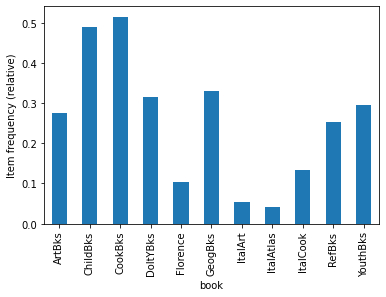

In [25]:
itemFrequency.plot.bar()
plt.ylabel('Item frequency (relative)')
plt.show()

##### apriori를 활용하여 itemset과 itemset별 support 값을 출력하시오.
- apriori 함수 활용
- 최소지지도 (min_support) = 0.2

In [26]:
apriori(mlx_df, min_support=0.2, use_colnames=True).sort_values("support", ascending=False)

,support,itemsets
2,0.515029,(CookBks)
1,0.488379,(ChildBks)
4,0.330648,(GeogBks)
3,0.315773,(DoItYBks)
7,0.299969,"(ChildBks, CookBks)"
6,0.295321,(YouthBks)
0,0.276418,(ArtBks)
5,0.253796,(RefBks)
9,0.209173,"(CookBks, DoItYBks)"
8,0.200186,"(ChildBks, DoItYBks)"


##### maximal frequent itemsets

In [27]:
fpmax(mlx_df, min_support=0.2, use_colnames=True)

,support,itemsets
0,0.253796,(RefBks)
1,0.276418,(ArtBks)
2,0.295321,(YouthBks)
3,0.200186,"(ChildBks, DoItYBks)"
4,0.209173,"(CookBks, DoItYBks)"
5,0.330648,(GeogBks)
6,0.299969,"(ChildBks, CookBks)"


##### association_rules을 이용하여 지지도 (Support), 신뢰도 (Confidence) 그리고 향상도 (Lift)를 구하시오.
- min_threshold : 0.5

In [29]:
itemsets = apriori(mlx_df, min_support=0.1, use_colnames=True).sort_values("support", ascending=False)
rules = association_rules(itemsets, min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.488379,0.515029,0.299969,0.614213,1.192579,0.048439,1.257095
1,(CookBks),(ChildBks),0.515029,0.488379,0.299969,0.582431,1.192579,0.048439,1.225236
2,(DoItYBks),(CookBks),0.315773,0.515029,0.209173,0.662414,1.286168,0.046540,1.436584
3,(DoItYBks),(ChildBks),0.315773,0.488379,0.200186,0.633955,1.298079,0.045969,1.397698
4,(YouthBks),(CookBks),0.295321,0.515029,0.199566,0.675761,1.312082,0.047467,1.495718
5,(GeogBks),(CookBks),0.330648,0.515029,0.193678,0.585754,1.137322,0.023385,1.170732
6,(YouthBks),(ChildBks),0.295321,0.488379,0.182832,0.619098,1.267657,0.038604,1.343181
7,(GeogBks),(ChildBks),0.330648,0.488379,0.181283,0.548266,1.122624,0.019801,1.132571
8,(RefBks),(CookBks),0.253796,0.515029,0.173226,0.682540,1.325244,0.042513,1.527657
9,(RefBks),(ChildBks),0.253796,0.488379,0.158971,0.626374,1.282556,0.035022,1.369338


##### antecedents가 2개이고 consequents가 최대 1개인 rules만 찾아 결과를 출력하시오.
- itemsets은 min_support=0.1로 해서 구하고, rules는 min_threshold=0.5로 해서 구하기

In [30]:
itemsets = apriori(mlx_df, min_support=0.1, use_colnames=True).sort_values("support", ascending=False)
rules = association_rules(itemsets, min_threshold=0.5)

rules = rules[[len(c)==2 for c in rules.antecedents]]
rules = rules[[len(c)==1 for c in rules.consequents]]

rules.sort_values(by=['consequents', 'lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(CookBks, DoItYBks)",(ChildBks),0.209173,0.488379,0.158351,0.757037,1.550101,0.056196,2.105756
15,"(CookBks, YouthBks)",(ChildBks),0.199566,0.488379,0.148745,0.745342,1.526153,0.051281,2.009047
21,"(CookBks, RefBks)",(ChildBks),0.173226,0.488379,0.128293,0.740608,1.516461,0.043693,1.972386
19,"(CookBks, GeogBks)",(ChildBks),0.193678,0.488379,0.135730,0.700800,1.434950,0.041141,1.709962
14,"(ChildBks, YouthBks)",(CookBks),0.182832,0.515029,0.148745,0.813559,1.579637,0.054581,2.601206
24,"(YouthBks, DoItYBks)",(CookBks),0.127983,0.515029,0.103812,0.811138,1.574935,0.037897,2.567857
20,"(ChildBks, RefBks)",(CookBks),0.158971,0.515029,0.128293,0.807018,1.566935,0.046418,2.513029
11,"(ChildBks, DoItYBks)",(CookBks),0.200186,0.515029,0.158351,0.791022,1.535877,0.055250,2.320674
18,"(ChildBks, GeogBks)",(CookBks),0.181283,0.515029,0.135730,0.748718,1.453738,0.042364,1.929985
10,"(ChildBks, CookBks)",(DoItYBks),0.299969,0.315773,0.158351,0.527893,1.671746,0.063629,1.449303


##### 성별까지  rule에 포함시키고 싶다면?

##### 성별을 rule에 포함시키기 위해 필요한 데이터 형태로 변환하시오.

In [34]:
mlx_df.reset_index().head(2)

book,ID#,Gender,ArtBks,ChildBks,CookBks,DoItYBks,Florence,GeogBks,ItalArt,ItalAtlas,ItalCook,RefBks,YouthBks
0,25,1,0,0,1,0,0,0,0,0,0,0,1
1,46,1,0,1,1,0,0,1,0,0,1,1,1


In [36]:
mlx_df_s = mlx_df.reset_index()
mlx_df_s.Gender = mlx_df_s.Gender.astype("category")
mlx_df_s = pd.get_dummies(mlx_df_s)
mlx_df_s.head(2)

,ID#,ArtBks,ChildBks,CookBks,DoItYBks,Florence,GeogBks,ItalArt,ItalAtlas,ItalCook,RefBks,YouthBks,Gender_0,Gender_1
0,25,0,0,1,0,0,0,0,0,0,0,1,0,1
1,46,0,1,1,0,0,1,0,0,1,1,1,0,1


In [37]:
mlx_df_s.set_index("ID#", inplace=True)
mlx_df_s.head(2)

,ArtBks,ChildBks,CookBks,DoItYBks,Florence,GeogBks,ItalArt,ItalAtlas,ItalCook,RefBks,YouthBks,Gender_0,Gender_1
ID#,,,,,,,,,,,,,
25,0,0,1,0,0,0,0,0,0,0,1,0,1
46,0,1,1,0,0,1,0,0,1,1,1,0,1


In [38]:
mlx_df_s

,ArtBks,ChildBks,CookBks,DoItYBks,Florence,GeogBks,ItalArt,ItalAtlas,ItalCook,RefBks,YouthBks,Gender_0,Gender_1
ID#,,,,,,,,,,,,,
25,0,0,1,0,0,0,0,0,0,0,1,0,1
46,0,1,1,0,0,1,0,0,1,1,1,0,1
61,0,0,0,0,0,1,0,0,0,0,0,0,1
79,0,1,0,0,0,0,0,0,0,0,0,0,1
90,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32928,0,1,0,0,0,1,0,0,0,0,0,0,1
32948,1,0,0,0,0,1,0,0,0,0,0,0,1
32954,0,1,1,1,0,1,0,0,0,1,1,0,1


##### apriori를 활용하여 itemset과 itemset별 support 값을 출력하시오.
- apriori 함수 활용
- 최소지지도 (min_support) = 0.2

In [39]:
itemsets = apriori(mlx_df_s, min_support=0.2, use_colnames=True).sort_values("support", ascending=False)
itemsets

,support,itemsets
8,0.700651,(Gender_1)
2,0.515029,(CookBks)
1,0.488379,(ChildBks)
13,0.367834,"(CookBks, Gender_1)"
11,0.346142,"(ChildBks, Gender_1)"
4,0.330648,(GeogBks)
3,0.315773,(DoItYBks)
9,0.299969,"(ChildBks, CookBks)"
7,0.299349,(Gender_0)
6,0.295321,(YouthBks)


##### itemsets에 Gender 정보가 포함된 경우만 출력하시오.

In [40]:
filtering \
= itemsets["itemsets"].apply(lambda x: True if ("Gender_1" in x)|("Gender_0" in x) else False)
itemsets[filtering]

,support,itemsets
8,0.700651,(Gender_1)
13,0.367834,"(CookBks, Gender_1)"
11,0.346142,"(ChildBks, Gender_1)"
7,0.299349,(Gender_0)
15,0.235823,"(Gender_1, GeogBks)"
14,0.217849,"(Gender_1, DoItYBks)"
17,0.216920,"(ChildBks, CookBks, Gender_1)"
16,0.209792,"(Gender_1, YouthBks)"


##### association_rules을 이용하여 지지도 (Support), 신뢰도 (Confidence) 그리고 향상도 (Lift)를 구하시오.
- min_threshold : 0.5

In [41]:
rules = association_rules(itemsets, min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(Gender_1),0.515029,0.700651,0.367834,0.714200,1.019338,0.006978,1.047407
1,(Gender_1),(CookBks),0.700651,0.515029,0.367834,0.524989,1.019338,0.006978,1.020967
2,(ChildBks),(Gender_1),0.488379,0.700651,0.346142,0.708756,1.011569,0.003959,1.027831
3,(ChildBks),(CookBks),0.488379,0.515029,0.299969,0.614213,1.192579,0.048439,1.257095
4,(CookBks),(ChildBks),0.515029,0.488379,0.299969,0.582431,1.192579,0.048439,1.225236
5,(GeogBks),(Gender_1),0.330648,0.700651,0.235823,0.713215,1.017932,0.004154,1.043809
6,(DoItYBks),(Gender_1),0.315773,0.700651,0.217849,0.689892,0.984645,-0.003397,0.965307
7,"(ChildBks, CookBks)",(Gender_1),0.299969,0.700651,0.216920,0.723140,1.032098,0.006746,1.081232
8,"(ChildBks, Gender_1)",(CookBks),0.346142,0.515029,0.216920,0.626679,1.216782,0.038646,1.299070
9,"(CookBks, Gender_1)",(ChildBks),0.367834,0.488379,0.216920,0.589722,1.207508,0.037277,1.247010
